# **Supervised Learning Project: Heart Disease**

For this project I utilized the Heart Disease Dataset from UCI Machine Learning Repository.

Link to dataset: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data

Project Goal: Find the best method to accurately determine if someone has heart disease based on certain attributes.

Author Citations:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

**Import Modules**
For this project I a testing three different machine learning algorithms to find the best method to determine has a heart disease based on certain attributes. The three algorithms are Logistic Regression, Random Forest Classication, and SVC.

Import pandas and numpy for data manipulation.
Import Seaborn and Matplotlip for data visualization.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


ModuleNotFoundError: No module named 'opendatasets'

# Data Description

dataset = heart_disease_uci.csv

Size = 79.35 kb



This dataset has **920 rows and 16 columns**. The dataset has 4 classes of heart disease and 0 identifies no heart disease. The goal is to determine if someone has a heart disease based on the features so 1-4 are grouped together essentially making it a binary classification problem. The data is composed of data collected from different sources differentiated from Cleveland, Hungary, and other. There are **14 factors** which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia.



In [ ]:
file_path = "/content/heart_disease_uci.csv"

df = pd.read_csv(file_path)
print('Head: ', df.head)


print('columns', df.columns)
print('Shape: ', df.shape)

#group heart disease together to determine if someone has heart disease or not.
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

Head:  <bound method NDFrame.head of       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  

Check where the data comes from

# Data Types
The datatypes present in this dataset are int64, float64, and object.

Drop irrelevant columns like id and dataset(stores the city where data was collected).


In [ ]:
df = df.drop(['id', 'dataset'], axis=1)

In [ ]:
print(df.dtypes)

age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


# Null Values
Assess null values using isnull.sum() and drop columns with more a large amount of null values.

In [ ]:
print(df.isnull().sum())

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


Slope, ca, and thal columns contained a significant amount of null values so drop these columns.

In [ ]:
df = df.drop(columns=['slope', 'ca', 'thal'])

# Duplicate Values

Check for duplicate values in the dataset and remove if there are any present.

In [ ]:
print(df.duplicated().any())

True


In [ ]:
df = df.drop_duplicates()
print(df.describe)
print(df.isnull().sum())
print(df.dtypes)

<bound method NDFrame.describe of      age     sex               cp  trestbps   chol    fbs           restecg  \
0     63    Male   typical angina     145.0  233.0   True    lv hypertrophy   
1     67    Male     asymptomatic     160.0  286.0  False    lv hypertrophy   
2     67    Male     asymptomatic     120.0  229.0  False    lv hypertrophy   
3     37    Male      non-anginal     130.0  250.0  False            normal   
4     41  Female  atypical angina     130.0  204.0  False    lv hypertrophy   
..   ...     ...              ...       ...    ...    ...               ...   
915   54  Female     asymptomatic     127.0  333.0   True  st-t abnormality   
916   62    Male   typical angina       NaN  139.0  False  st-t abnormality   
917   55    Male     asymptomatic     122.0  223.0   True  st-t abnormality   
918   58    Male     asymptomatic       NaN  385.0   True    lv hypertrophy   
919   62    Male  atypical angina     120.0  254.0  False    lv hypertrophy   

     thalch  exan

Drop rows from the dataset that contain null entries.

In [ ]:
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])

df = df.dropna()
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.shape)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64
0
(918, 11)


# Explore Numerical Values


In [ ]:
numeric = df.select_dtypes(include=['int64', 'float64'])
categorical = df.select_dtypes(include=['object', 'category'])
print(df.dtypes)

age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang          bool
oldpeak     float64
num           int64
dtype: object


Plot the distribution of the numeric data and assess the distribution.

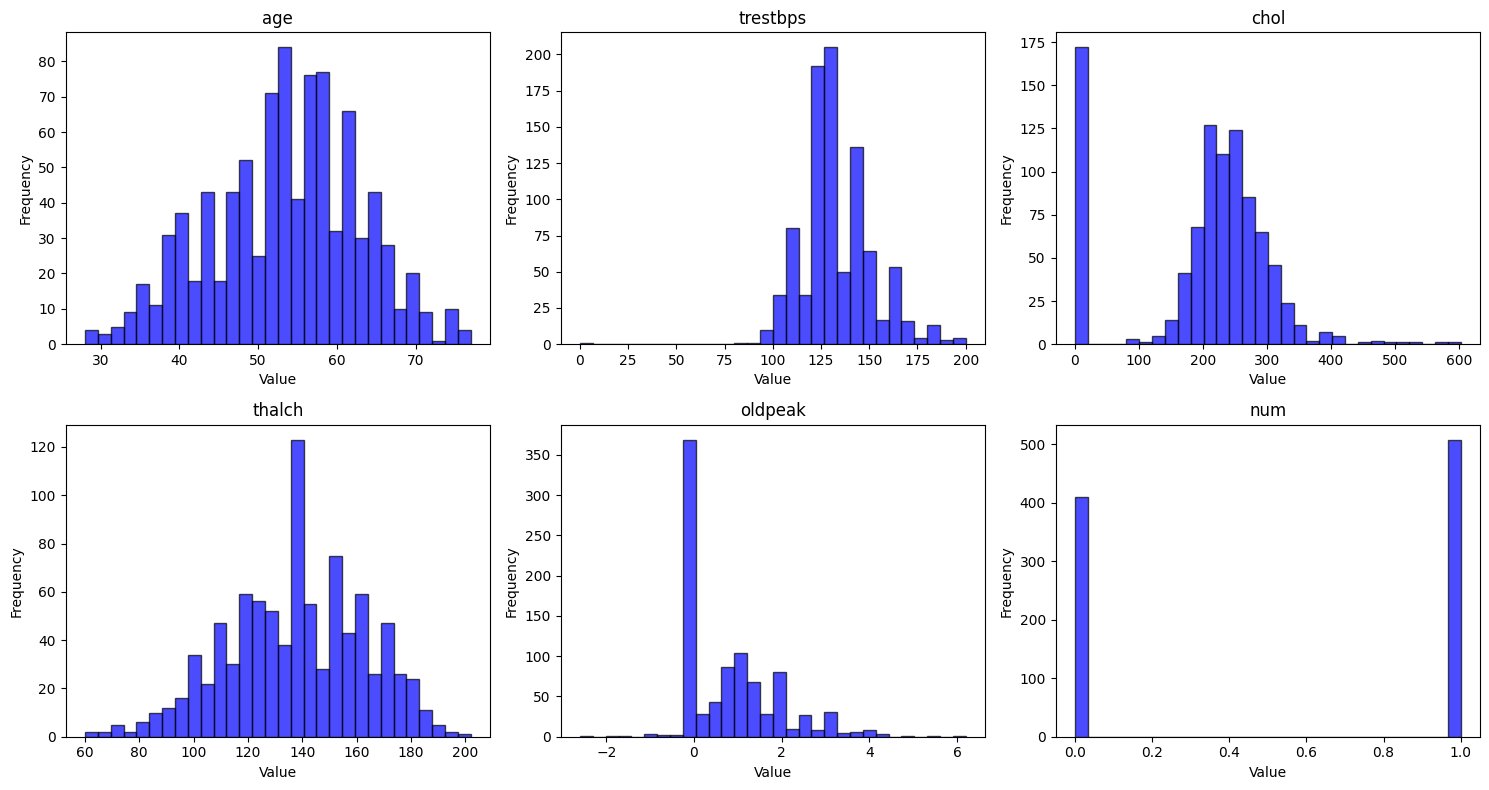

In [ ]:
num_features = numeric.shape[1]
rows = (num_features + 2) // 3  # Number of rows (3 columns per row)
plt.figure(figsize=(15, rows * 4))  # Adjust figure size for better readability

for i, col in enumerate(numeric.columns, 1):
    plt.subplot(rows, 3, i)
    plt.hist(numeric[col], bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.title(col)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

The oldpeak value is skewed right and the cholesterol distribution has a spike at 0.

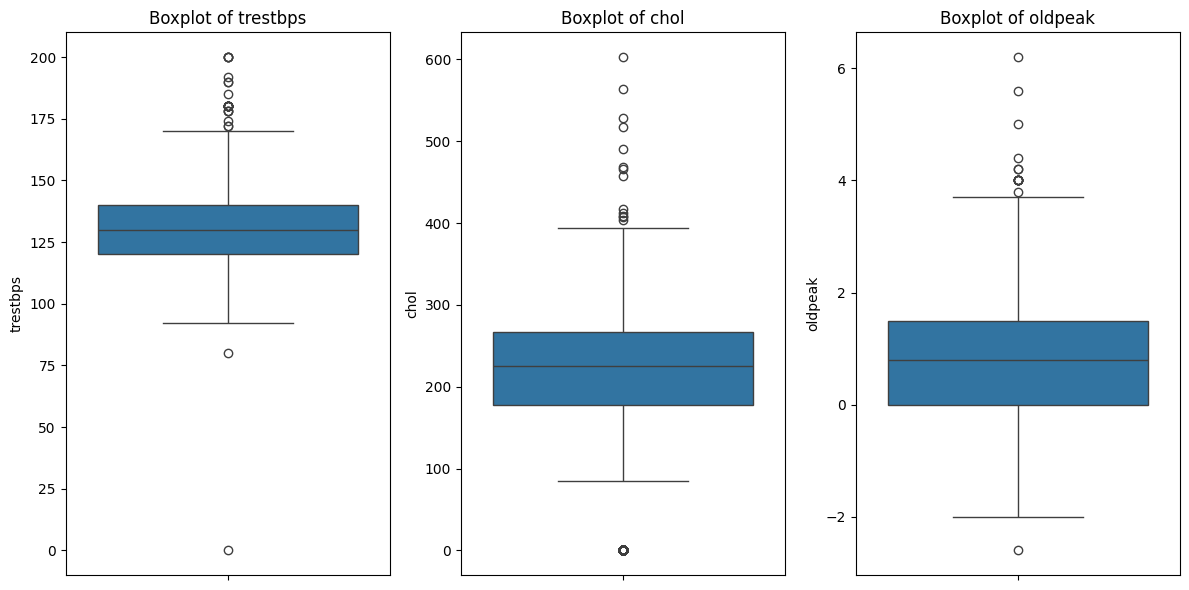

In [ ]:
features = ['trestbps', 'chol', 'oldpeak']

# Create boxplots
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=numeric, y=feature)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
numeric = numeric[numeric['chol'] != 0]

In [ ]:

print(numeric.describe)
print(numeric.dtypes)

<bound method NDFrame.describe of      age    trestbps   chol      thalch   oldpeak  num
0     63  145.000000  233.0  150.000000  2.300000    0
1     67  160.000000  286.0  108.000000  1.500000    1
2     67  120.000000  229.0  129.000000  2.600000    1
3     37  130.000000  250.0  187.000000  3.500000    0
4     41  130.000000  204.0  172.000000  1.400000    0
..   ...         ...    ...         ...       ...  ...
915   54  127.000000  333.0  154.000000  0.000000    1
916   62  132.137369  139.0  137.542294  0.880841    0
917   55  122.000000  223.0  100.000000  0.000000    1
918   58  132.137369  385.0  137.542294  0.880841    0
919   62  120.000000  254.0   93.000000  0.000000    1

[746 rows x 6 columns]>
age           int64
trestbps    float64
chol        float64
thalch      float64
oldpeak     float64
num           int64
dtype: object


After removing the data entries where cholesterol is at level 0 we see a more normal distribution of data.

Text(0, 0.5, 'Frequency')

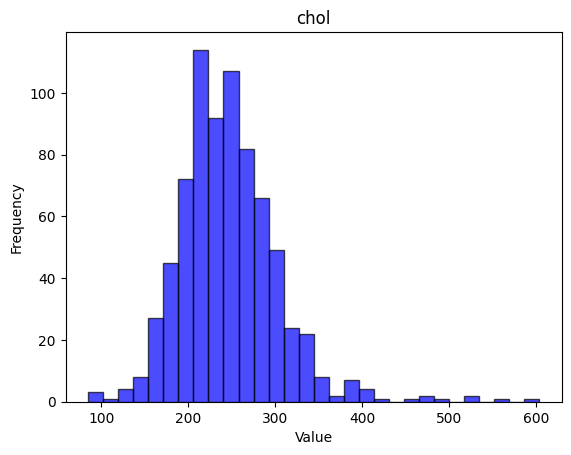

In [ ]:

plt.hist(numeric['chol'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('chol')
plt.xlabel("Value")
plt.ylabel("Frequency")

Next make a correlation matrix in order to assess strong positive and negative correlations and check for multicollinearity.

In [ ]:
numeric.corr()

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.236132,0.081717,-0.353552,0.271371,0.298617
trestbps,0.236132,1.000000,0.085314,-0.111985,0.193292,0.160397
chol,0.081717,0.085314,1.000000,-0.045186,0.044601,0.116823
thalch,-0.353552,-0.111985,-0.045186,1.000000,-0.248161,-0.353929
oldpeak,0.271371,0.193292,0.044601,-0.248161,1.000000,0.463782
num,0.298617,0.160397,0.116823,-0.353929,0.463782,1.000000


<Axes: >

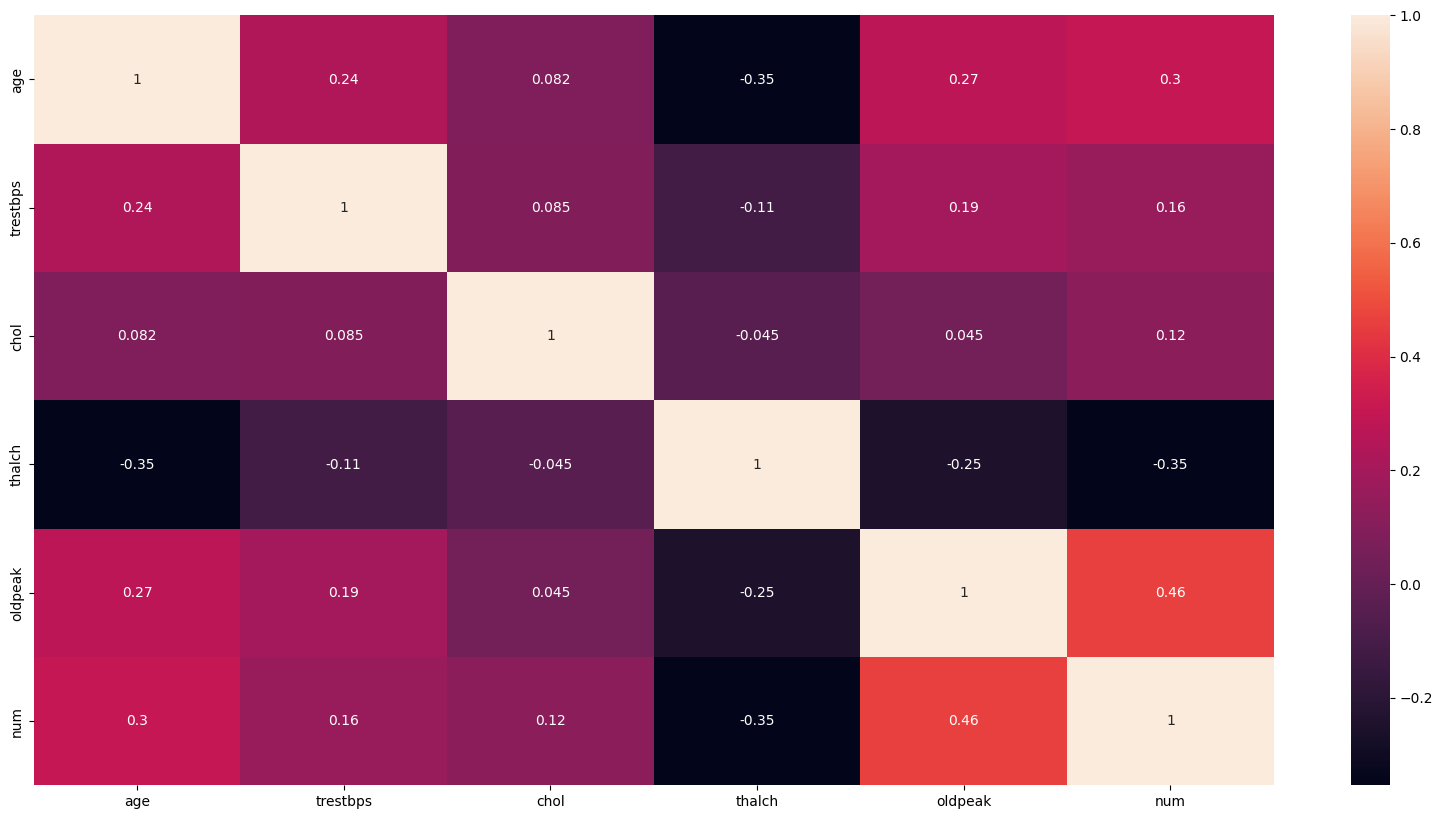

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(numeric.corr(), annot=True)

Based on the correlation matrix there are no signs of strong multicollinearity.

Next we can explore relationships between pairs using a pairplot.

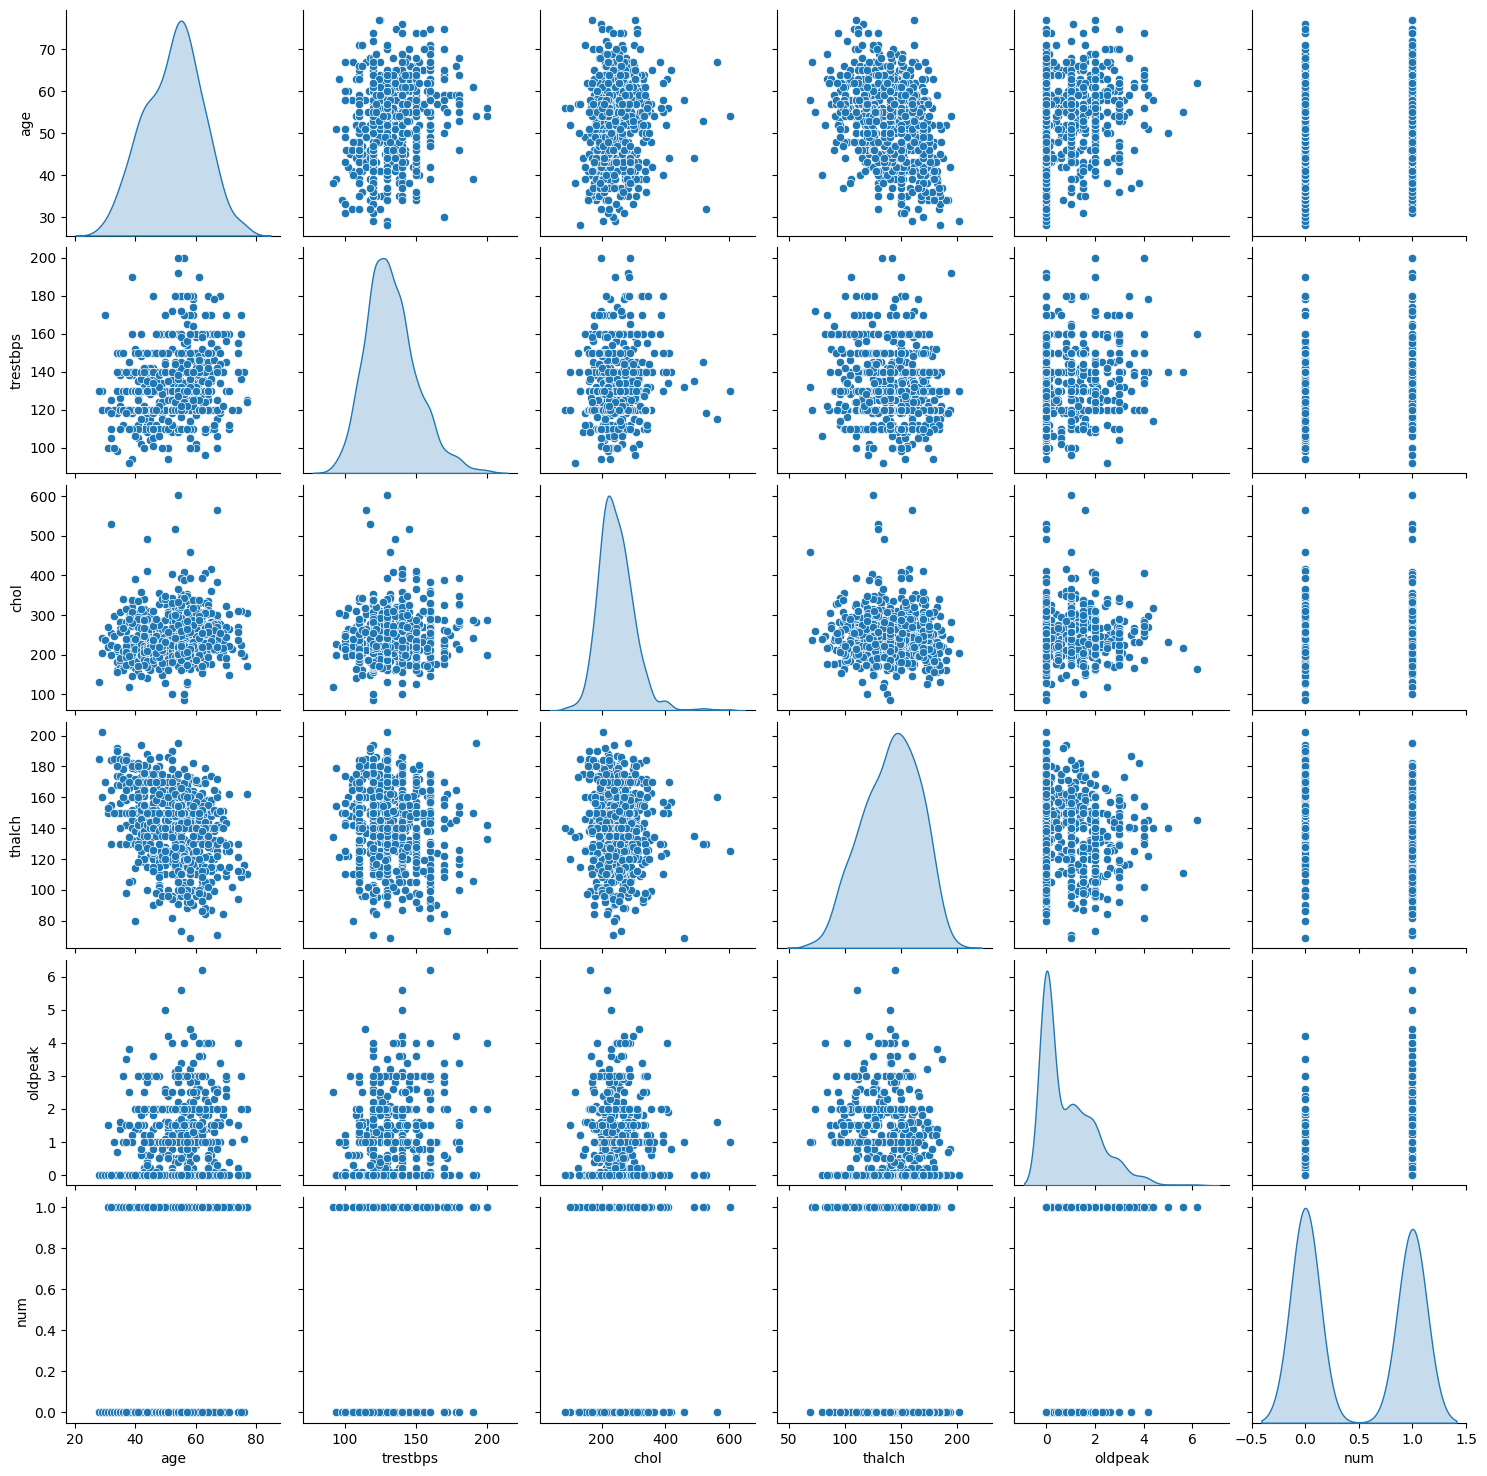

In [ ]:
sns.pairplot(numeric.iloc[:, :10], diag_kind = "kde")
plt.show()

The pair plot above highlights some relationships between pairs. Resting blood pressure and age show a strong correlation and maximum heart rate.

# Categorical Distributions

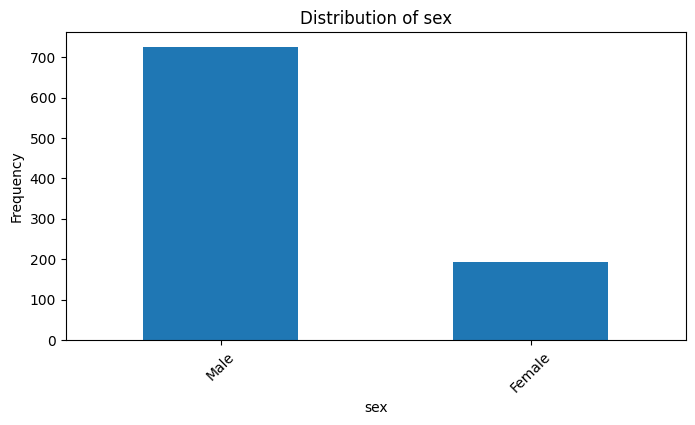

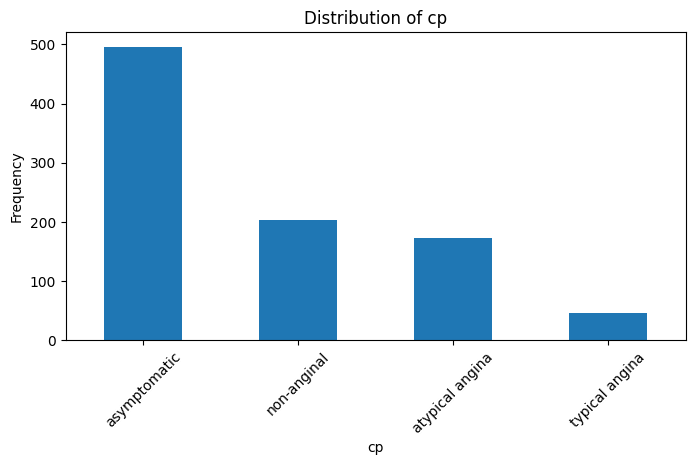

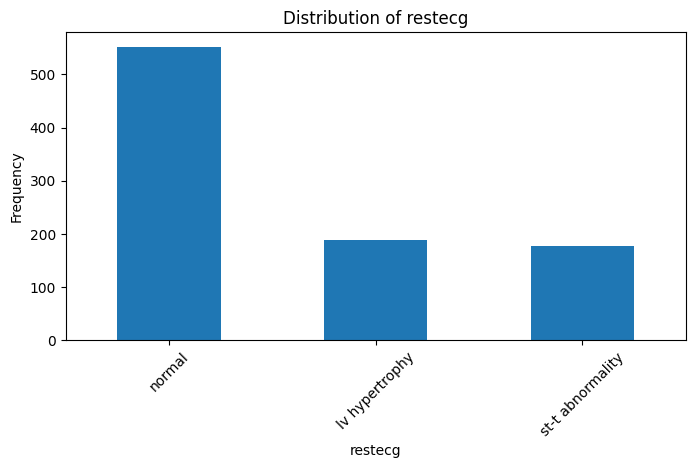

In [ ]:
for col in categorical.columns:

    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.show()

Remove the 0 level cholesterol rows from the dataset.

In [ ]:
df = df[df['chol'] != 0]
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64


# Data Preprocessing

Split the data into X_train, X_test, y_train, y_test. Using pd.get_dummies adjust categorical data types into numerical data types. Scale the data using StandardScaler from sklearn's preprocessing to normalize data for better use in sensitive models like Logistic Regression and Support Vector Machines.


In [ ]:

target = 'num'
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
categorical_columns = X_train.select_dtypes(include=['object']).columns
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Align the test set with the training set to ensure consistent columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Asses training set class distribution and test set class distribution to see if the sets are balanced.

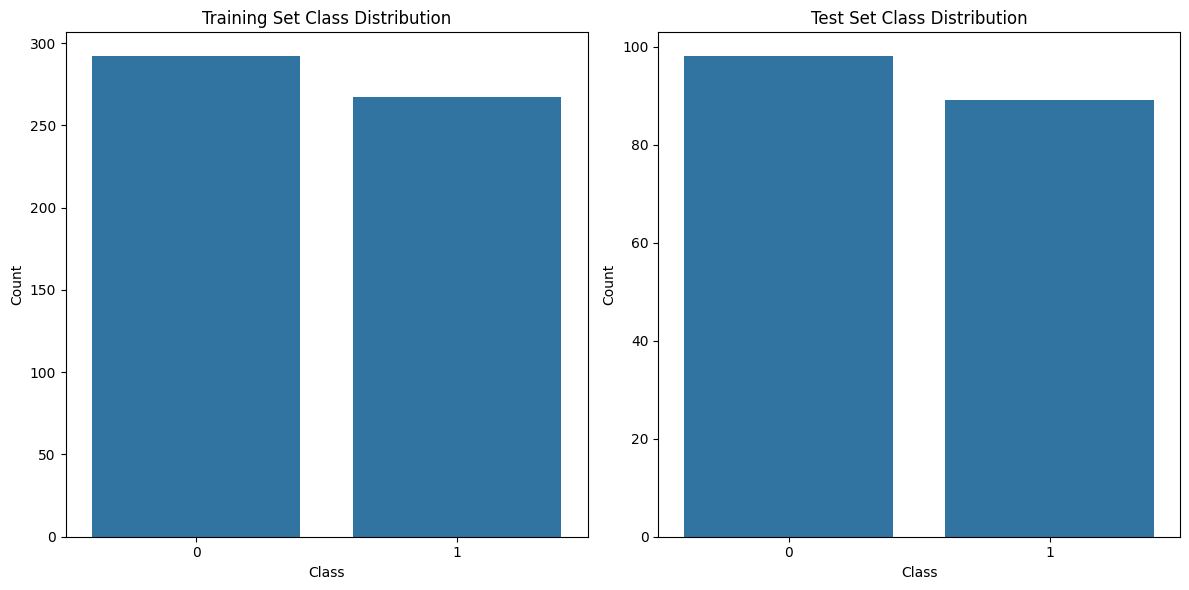

Training Set Class Distribution:
num
0    0.522361
1    0.477639
Name: proportion, dtype: float64
Test Set Class Distribution:
num
0    0.524064
1    0.475936
Name: proportion, dtype: float64


In [ ]:
# Plot training set distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Training Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

# Plot test set distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title("Test Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

print("Training Set Class Distribution:")
print(y_train.value_counts(normalize=True))

print("Test Set Class Distribution:")
print(y_test.value_counts(normalize=True))

The class distribution on both the training set and the test set is fairly even showing that it is balanced.

# Model Selection
The three models I am assesing are Logistic Regression, Random Forest Classifier, and Support Vector Machines.

**Evaluating the Model:**

To evaluate the model performance I assessed the precision, recall, f1-score, and the cross-val-score.


In [ ]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)



y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Best parameters and score
print(accuracy)
print(report)

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy")
print(f"Mean CV Score: {cv_scores.mean():.2f}")

0.8181818181818182
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        98
           1       0.78      0.87      0.82        89

    accuracy                           0.82       187
   macro avg       0.82      0.82      0.82       187
weighted avg       0.82      0.82      0.82       187

Mean CV Score: 0.80


In [ ]:
model = RandomForestClassifier()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Best parameters and score
print(accuracy)
print(report)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy")
print(f"Mean CV Score: {cv_scores.mean():.2f}")

0.7967914438502673
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        98
           1       0.76      0.84      0.80        89

    accuracy                           0.80       187
   macro avg       0.80      0.80      0.80       187
weighted avg       0.80      0.80      0.80       187

Mean CV Score: 0.75


In [ ]:
model = SVC()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Best parameters and score
print(accuracy)
print(report)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy")
print(f"Mean CV Score: {cv_scores.mean():.2f}")

0.8288770053475936
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        98
           1       0.82      0.82      0.82        89

    accuracy                           0.83       187
   macro avg       0.83      0.83      0.83       187
weighted avg       0.83      0.83      0.83       187

Mean CV Score: 0.79


I wanted to continue tuning the parameters for the Logistic Regression model. I utilized GridSearchCV to find the best parameters with 5 folds and ROC Area Under Curve.

In [ ]:
param_grid = {
    'C': [2**i for i in range(-10,6)],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [500, 1000, 5000, 10000],
}
grid = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring="recall")
grid.fit(X_train_scaled, y_train)
best_model = grid.best_estimator_
best_params = grid.best_params_
best_score = grid.best_score_





print(best_params)
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)
print(report)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="recall")
print(f"Mean CV Score: {cv_scores.mean():.2f}")


{'C': 0.0625, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
0.8128342245989305
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        98
           1       0.78      0.85      0.81        89

    accuracy                           0.81       187
   macro avg       0.81      0.81      0.81       187
weighted avg       0.82      0.81      0.81       187

Mean CV Score: 0.79


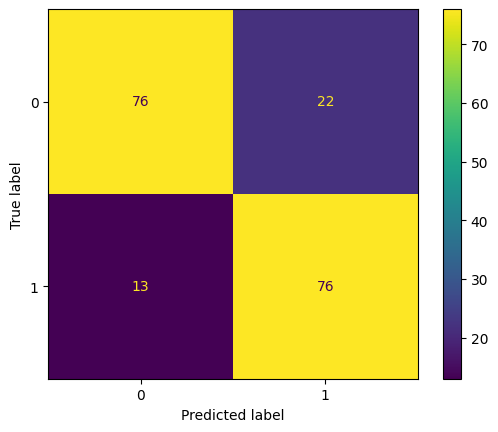

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
disp.plot()
plt.show()

By using a **confusion matrix** you can see how the model performed in classifying between yes or no. The model has a misclassification rate of 0.145 which suggests the model does well in identifying heart disease. It is better to misclassify a false positive over a false negative in this scenario. The model misclassifies 12.8 percent of the no heart disease class incorrectly which is slightly dangerous and not ideal since it is suggest that 12/100 people have no heart disease when they do.


In [ ]:
param_grid = {
    'C': [2**i for i in range(-10,6)],
    'gamma': [2**i for i in range(-10,6)]
}
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring="recall")
grid.fit(X_train_scaled, y_train)
best_model = grid.best_estimator_
best_params = grid.best_params_
best_score = grid.best_score_





print(best_params)
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)
print(report)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="recall")
print(f"Mean CV Score: {cv_scores.mean():.2f}")


{'C': 0.5, 'gamma': 0.03125}
0.839572192513369
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        98
           1       0.84      0.82      0.83        89

    accuracy                           0.84       187
   macro avg       0.84      0.84      0.84       187
weighted avg       0.84      0.84      0.84       187

Mean CV Score: 0.79


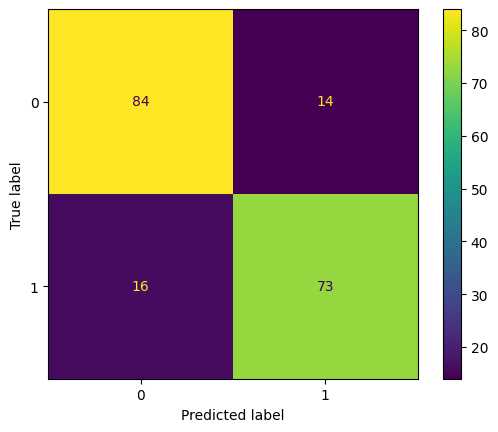

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
disp.plot()
plt.show()

# Model Evaluation

I utilized the ROC curve and assessed the AUC to evaluate model's performance.

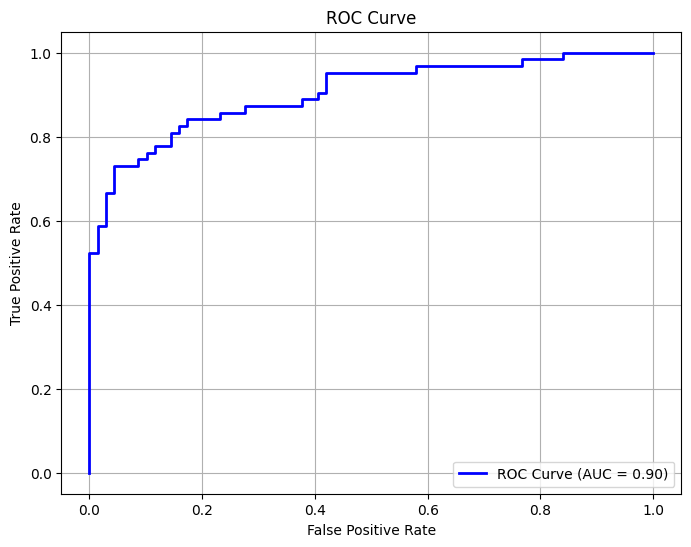

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


The area under the curve is 0.90 indicating a high accuracy.

Plot coefficients to better understand the features significance to the model.

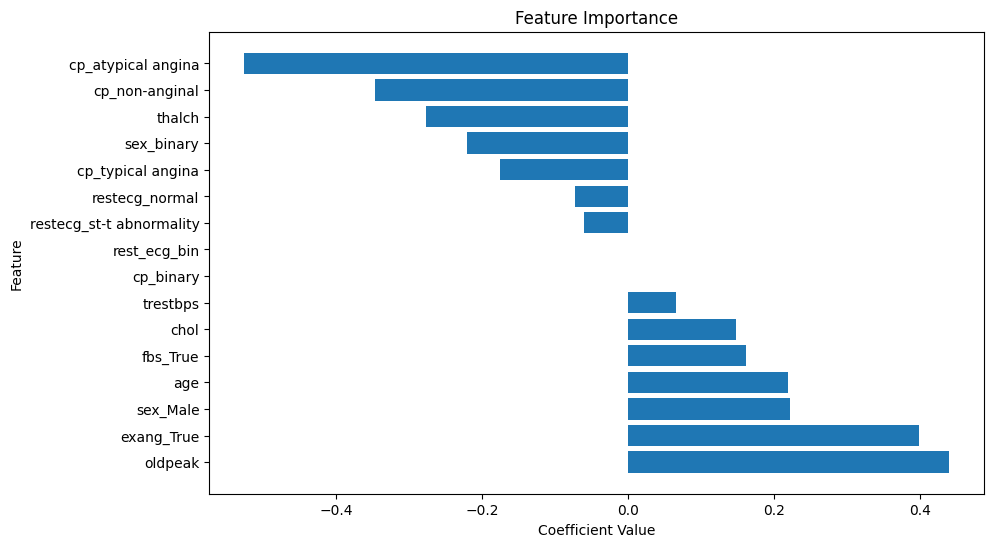

In [ ]:
coefficients = best_model.coef_[0]
feature_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

feature_df = feature_df.sort_values(by='Coefficient', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Discussion and Conclusion

All three of the models showed high performance to the dataset.

**Random Forest Classifier:** Achieved 81 percent accuracy score with high precision and recall scores between both classes indicating high performance.

**Support Vector Machine** Achieved 83.6 percent accuracy score with high precision and recall scores between both classes indicating high performance.

**Logistic Regression** Achieved 84.2 percent accuracy score with high precision and recall scores between both classes indicating high performance.

Using GridSearchCV to do hyperparameter tuning we find the best parameters to use are {'C': 0.015625, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}.

The low C value can indicate noisy data so the model is generalizing the data into two classes. This could potentially penalize other important features in this dataset and underfit.

The ROC area under curve is also high at 0.91 which means the model is able to determine true positives and true negatives well from false positives and negatives.

**Improvements:** Possible improvements in data cleaning could be using Principal Component Analysis to reduce noise for better data for the model. The models achieved fairly high accuracy but testing other models for classification such Adaboost or DecisionTree could yield better results.